<a href="https://colab.research.google.com/github/BaeSang1/Study/blob/main/202304/python230421.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


## 오늘 배울 내용
- Feature Enginnering : 정규화
- 하이퍼 파라미터 튜닝

In [5]:
data = wine[['alcohol','sugar','pH']].to_numpy()  # to_numpy = 수치연산하겠다 (= 행렬로 변환하겠다.)
target = wine['class'].to_numpy()

data.shape, target.shape

((6497, 3), (6497,))

## 데이터셋 분리
- scikit-learn machine learning pipeline 공부하기
    - 왜 꼭 pipline으로 코드를 짜야 하는가??
        - Data Leakage

In [6]:
from sklearn.model_selection import train_test_split  # 내가 짜는 코드에 대한 train 데이터와 test 데이터가 섞이는 것인가? 확인 잘 하기

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5197, 3), (1300, 3), (5197,), (1300,))

## Feature Engineering
- 정규화라는 것을 왜 할까?
    - 수치 데이터의 단위가 다 다름
    - Min-Max Scaler : 0-1 사이의 데이터로 분포 재정리
        - 수치 변환을 하게 되면 원래의 값 정보는 손실
        - 수치 변환을 하게 돼도 데이터 순서는 변동이 없음

- 선형모델 vs 비선형모델
    - 나는 무조건 비선형모델 : 정규화 작업 필요 없음
    - 나는 무조건 선형모델 : 정규화 작업 필요(데이터들이 단위 등 여러가지의 영향을 받아서)
        - 인코딩 된 변수들 (ex.더미 인코딩 한 변수(0과 1로 된 값) : 정규화 작업 필요 없음
    - 선형 + 비선형 : 일단 하자!(귀찮으면), 정석은 분리해서! 작업

In [7]:
# 기본 원칙 : train, test는 분리되어야 한다
# train, test를 분리하는 순간 test는 모르는 데이터로 인지하고 작업!
# 내가 짠 코드가 train, test가 섞인 건가? 의심
# Data Leakage 벗어날 수 있음

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [8]:
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

train_scaled.shape, test_scaled.shape

((5197, 3), (1300, 3))

In [10]:
X_train[0], train_scaled[0]

(array([10.5 ,  7.7 ,  3.19]), array([ 0.01376574,  0.4646116 , -0.16888369]))

## 모델링

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, y_train)

print(dt.score(train_scaled, y_train))  # 훈련 평가  99.69
print(dt.score(test_scaled, y_test))    # 검증 평가  85.92

# 차이가 많이 발생하면 과적합이 발생했다!
# 훈련평가, 검증평가 수치가 비슷해야 과적합이 발생하지 않은 것(최대한 줄이자!).
# 훈련을 통해 만든 모델이 내가 예상한 값을 나오게 하도록 만들기

0.996921300750433
0.8592307692307692


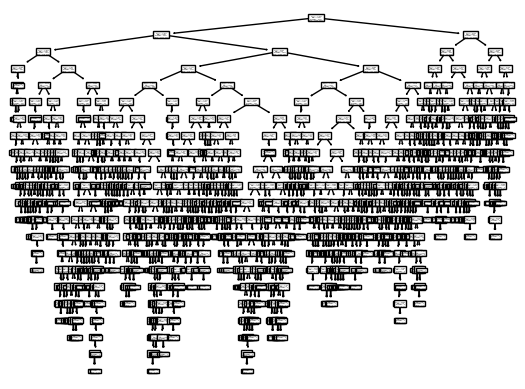

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure()
plot_tree(dt)

plt.show()

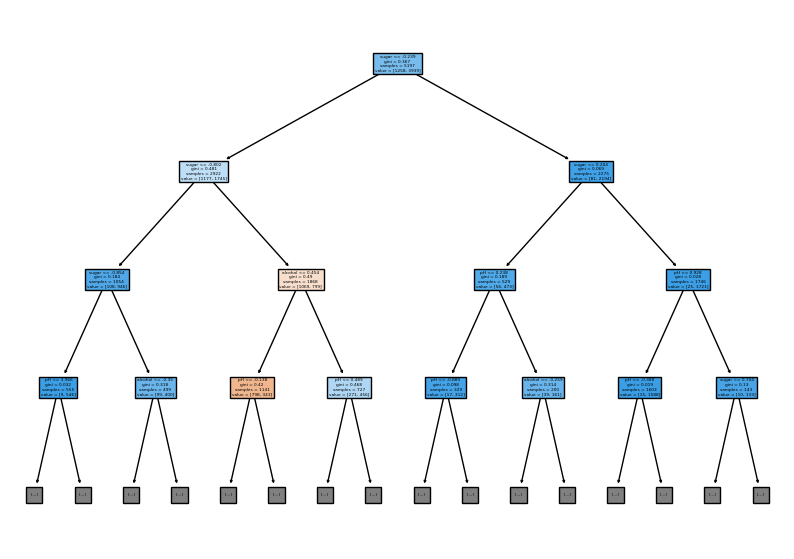

In [19]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=3, filled=True, feature_names=['alcohol', 'sugar', 'pH'])

plt.show()

# depth가 작으면 과소적합이 발생할 수 있음
# 과소적합이란?
# 훈련 평가 수치보다 검증 평가 수치가 더 높게 나옴

0.8454877814123533
0.8415384615384616


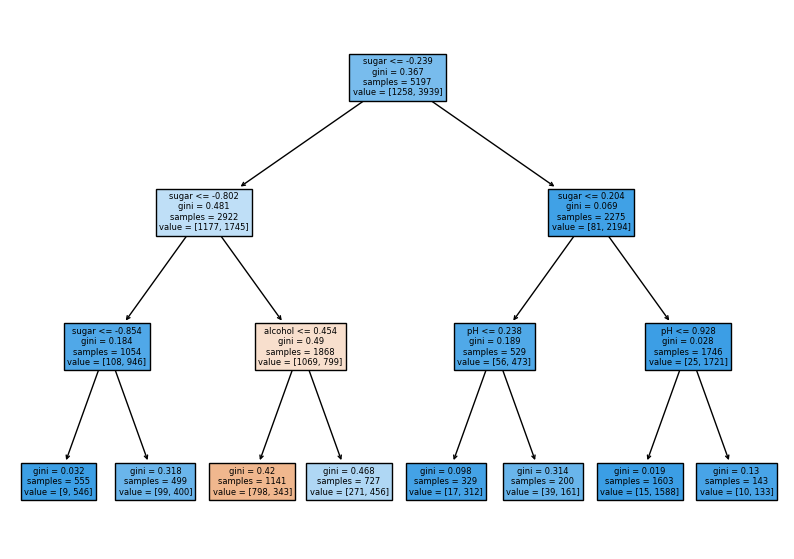

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 3, random_state=42)  # tree의 depth를 바꿔가며 최적의 모델을 찾아낸다 
dt.fit(train_scaled, y_train)

print(dt.score(train_scaled, y_train))  # 훈련 평가  84.54
print(dt.score(test_scaled, y_test))    # 검증 평가  84.15

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=3, filled=True, feature_names=['alcohol', 'sugar', 'pH'])

plt.show()